<a href="https://colab.research.google.com/github/herculesprof/DIO-Criando-um-Sistema-de-Recomendacao-por-Imagens-Digitais/blob/main/DIO_Criando_um_Sistema_de_Recomenda%C3%A7%C3%A3o_por_Imagens_Digitais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerando representações visuais do catálogo...
4/4 ━━━━━━━━━━━━━━━━━━━━ 52s 12s/step


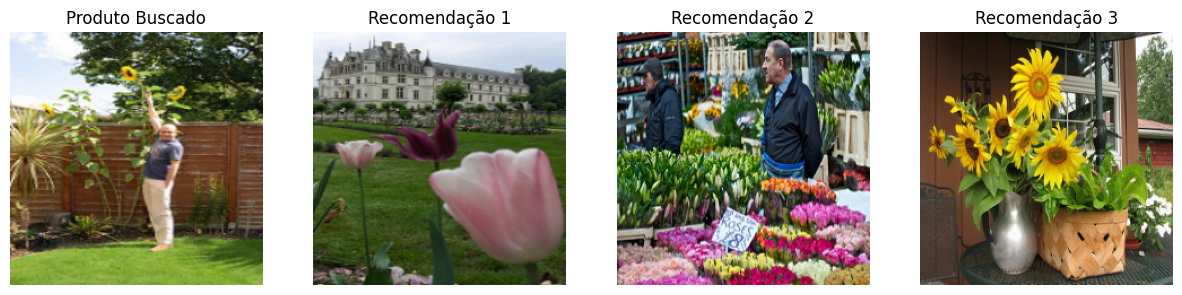

In [2]:
# @title Projeto: Sistema de Recomendação por Imagens Digitais
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# 1. Carregar Dataset incorporado (Flores) como nosso "catálogo de produtos"
ds = tfds.load('tf_flowers', split='train[:100]', as_supervised=True)
images = []
for img, label in ds:
    img_resized = tf.image.resize(img, (224, 224))
    images.append(img_resized.numpy())
images = np.array(images)

# 2. Carregar modelo VGG16 pré-treinado para extração de características (Embeddings)
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# 3. Extrair vetores de características (formato, cor, textura)
print("Gerando representações visuais do catálogo...")
embeddings = model.predict(preprocess_input(images.copy()))

# 4. Função de Recomendação por Similaridade
def recomendar(id_produto, num_recomendacoes=3):
    # Calcula a similaridade de cosseno entre o produto escolhido e o restante
    similares = cosine_similarity([embeddings[id_produto]], embeddings)[0]
    indices = similares.argsort()[-(num_recomendacoes+1):-1][::-1]

    # Exibição
    fig, axes = plt.subplots(1, num_recomendacoes + 1, figsize=(15, 5))
    axes[0].imshow(images[id_produto].astype(np.uint8))
    axes[0].set_title("Produto Buscado")
    axes[0].axis('off')

    for i, idx in enumerate(indices):
        axes[i+1].imshow(images[idx].astype(np.uint8))
        axes[i+1].set_title(f"Recomendação {i+1}")
        axes[i+1].axis('off')
    plt.show()

# 5. Testar o Sistema: Buscando recomendações para o produto no índice 10
recomendar(id_produto=10)